In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
customers_df=pd.read_csv("D:/sahyadri/8-sem/Customers.csv")
products_df=pd.read_csv("D:/sahyadri/8-sem/Products.csv")
transactions_df=pd.read_csv("D:/sahyadri/8-sem/Transactions.csv")

<h2>Descriptions for better understanding of the datasets</h2>

In [13]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [14]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [16]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [18]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [21]:
duplicate_customers = customers_df[customers_df.duplicated(subset=['CustomerID'])]
duplicate_products = products_df[products_df.duplicated(subset=['ProductID'])]
duplicate_transactions = transactions_df[transactions_df.duplicated(subset=['TransactionID'])]

if not duplicate_customers.empty:
    print("Duplicate Customer IDs found:")
    print(duplicate_customers)
else:
    print("Duplicate not found in Customer IDs")
if not duplicate_products.empty:
    print("Duplicate Product IDs found:")
    print(duplicate_products)
else:
    print("Duplicate not found in Product IDs")
if not duplicate_transactions.empty:
    print("Duplicate Transaction IDs found:")
    print(duplicate_transactions)
else:
    print("Duplicate not found in Transaction IDs")

Duplicate not found in Customer IDs
Duplicate not found in Product IDs
Duplicate not found in Transaction IDs


In [51]:
customers_df.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [50]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [49]:
transactions_df.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


<h3>checking for outliers</h3>

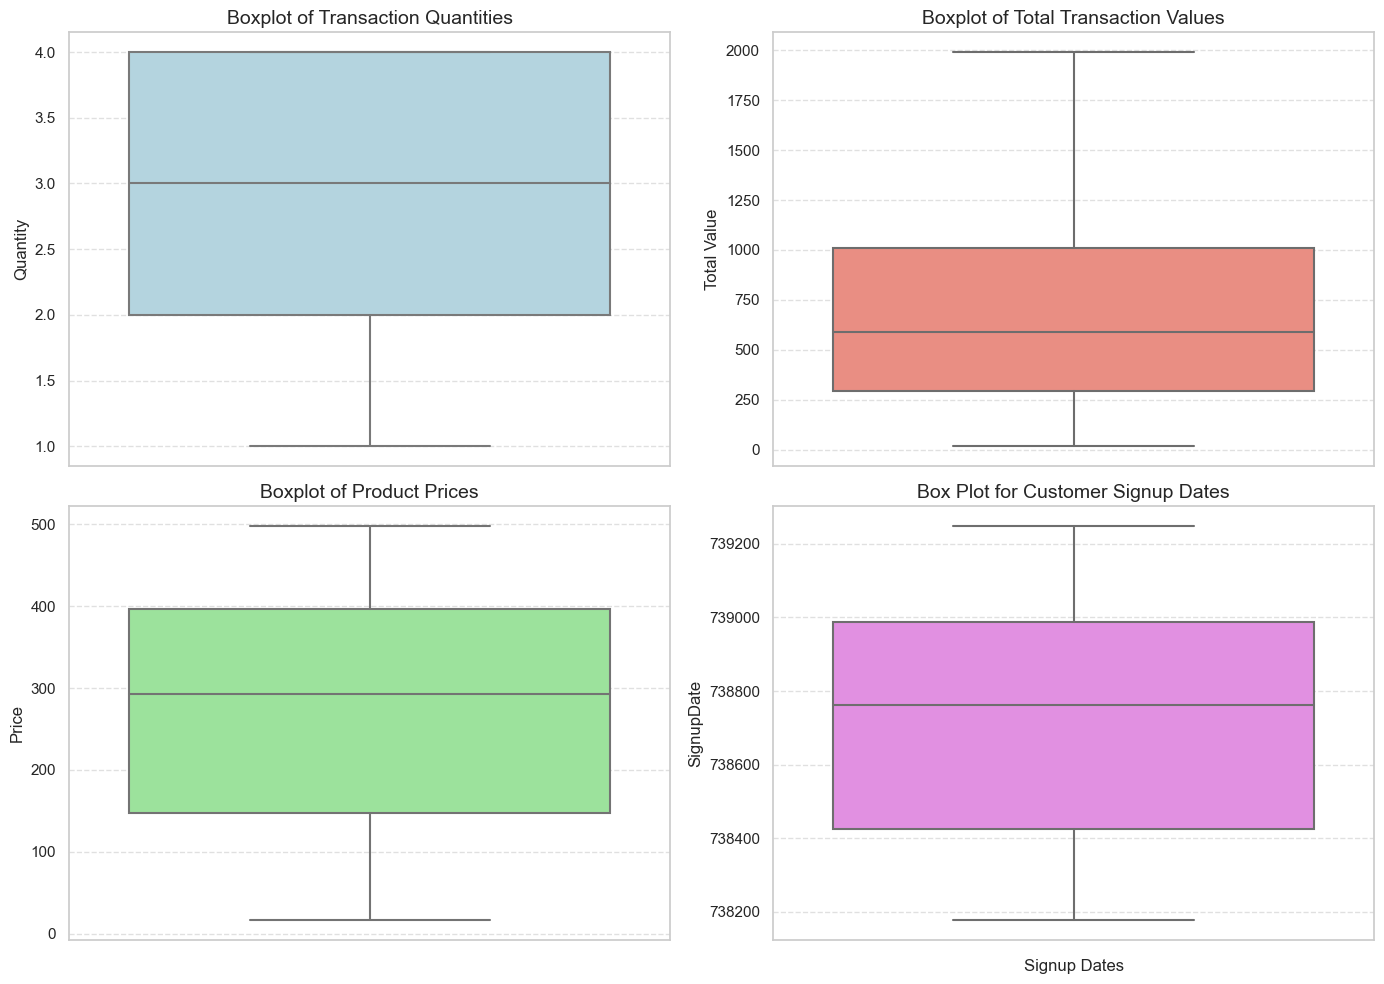

In [105]:
fig, axes = plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y=transactions_df['Quantity'], color='lightblue',ax=axes[0, 0])
axes[0,0].set_title('Boxplot of Transaction Quantities',fontsize=14)
axes[0,0].set_ylabel('Quantity', fontsize=12)
axes[0,0].grid(axis='y',linestyle='--',alpha=0.6)
sns.boxplot(y=transactions_df['TotalValue'],color='salmon', ax=axes[0, 1])
axes[0,1].set_title('Boxplot of Total Transaction Values', fontsize=14)
axes[0,1].set_ylabel('Total Value',fontsize=12)
axes[0,1].grid(axis='y',linestyle='--',alpha=0.6)
sns.boxplot(y=products_df['Price'], color='lightgreen', ax=axes[1, 0])
axes[1,0].set_title('Boxplot of Product Prices', fontsize=14)
axes[1,0].set_ylabel('Price', fontsize=12)
axes[1,0].grid(axis='y',linestyle='--',alpha=0.6)
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
sns.boxplot(y=customers_df['SignupDate'].apply(lambda x:x.toordinal()),color='violet',ax=axes[1, 1])
axes[1,1].set_title('Box Plot for Customer Signup Dates',fontsize=14)
axes[1,1].set_xlabel('Signup Dates', fontsize=12)
axes[1,1].grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

<h2>Customers</h2>

In [53]:
customers_summary={
    "Total Customers":customers_df['CustomerID'].nunique(),
    "Regions Covered":customers_df['Region'].nunique(),
    "Earliest Signup":customers_df['SignupDate'].min(),
    "Latest Signup":customers_df['SignupDate'].max()
}
customers_summary

{'Total Customers': 200,
 'Regions Covered': 4,
 'Earliest Signup': Timestamp('2022-01-22 00:00:00'),
 'Latest Signup': Timestamp('2024-12-28 00:00:00')}

In [54]:
signups_by_region=customers_df['Region'].value_counts()
signups_by_region

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [55]:
signups_over_time=customers_df['SignupDate'].dt.to_period("M").value_counts().sort_index()

<h3>Products</h3>

In [56]:
products_summary={
    "Total Products":products_df['ProductID'].nunique(),
    "Categories Covered":products_df['Category'].nunique(),
    "Most Expensive Product Price":products_df['Price'].max(),
    "Cheapest Product Price":products_df['Price'].min(),
}
products_summary

{'Total Products': 100,
 'Categories Covered': 4,
 'Most Expensive Product Price': 497.76,
 'Cheapest Product Price': 16.08}

In [57]:
top_category=products_df['Category'].value_counts().idxmax()
top_category_count=products_df['Category'].value_counts().max()
top_category,top_category_count

('Books', 26)

In [58]:
most_expensive_products=products_df[products_df['Price']==products_df['Price'].max()]
most_expensive_products

,ProductID,ProductName,Category,Price
74,P075,TechPro Textbook,Books,497.76


In [59]:
cheapest_products=products_df[products_df['Price']==products_df['Price'].min()]
cheapest_products

,ProductID,ProductName,Category,Price
55,P056,SoundWave Smartwatch,Electronics,16.08


<h3>Transactions</h3>

In [60]:
transactions_summary = {
    "Total Transactions": transactions_df['TransactionID'].nunique(),
    "Unique Customers": transactions_df['CustomerID'].nunique(),
    "Unique Products": transactions_df['ProductID'].nunique(),
    "Highest Transaction Value": transactions_df['TotalValue'].max(),
    "Total Revenue": transactions_df['TotalValue'].sum(),
}
transactions_summary

{'Total Transactions': 1000,
 'Unique Customers': 199,
 'Unique Products': 100,
 'Highest Transaction Value': 1991.04,
 'Total Revenue': 689995.56}

In [93]:
customer_spending_id=transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).reset_index()
customer_spending=customer_spending_id.merge(customers_df[['CustomerID','CustomerName']],on='CustomerID')
customer_spending=customer_spending.sort_values(by='TotalValue', ascending=False)
customer_spending.head(5)

,CustomerID,TotalValue,CustomerName
0,C0141,10673.87,Paul Parsons
1,C0054,8040.39,Bruce Rhodes
2,C0065,7663.70,Gerald Hines
3,C0156,7634.45,William Adams
4,C0082,7572.91,Aimee Taylor


In [62]:
product_popularity = transactions_df['ProductID'].value_counts().idxmax()
most_purchased_product = products_df[products_df['ProductID'] == product_popularity]
most_purchased_product

,ProductID,ProductName,Category,Price
58,P059,SoundWave Jeans,Clothing,303.2


In [64]:
transactions_over_time = transactions_df['TransactionDate'].dt.to_period("M").value_counts().sort_index()
transactions_over_time

TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64

<h2>Analysis-Visuals</h2>

In [96]:
top_spenders = customer_spending.head(5)
total_transactions=transactions_df['TransactionID'].nunique()
unique_customers=transactions_df['CustomerID'].nunique()
unique_products=transactions_df['ProductID'].nunique()
most_popular_product = products_df[products_df['ProductID']==product_popularity]
total_revenue=transactions_df['TotalValue'].sum()
highest_transaction=transactions_df.loc[transactions_df['TotalValue'].idxmax()]
sns.set(style="whitegrid")

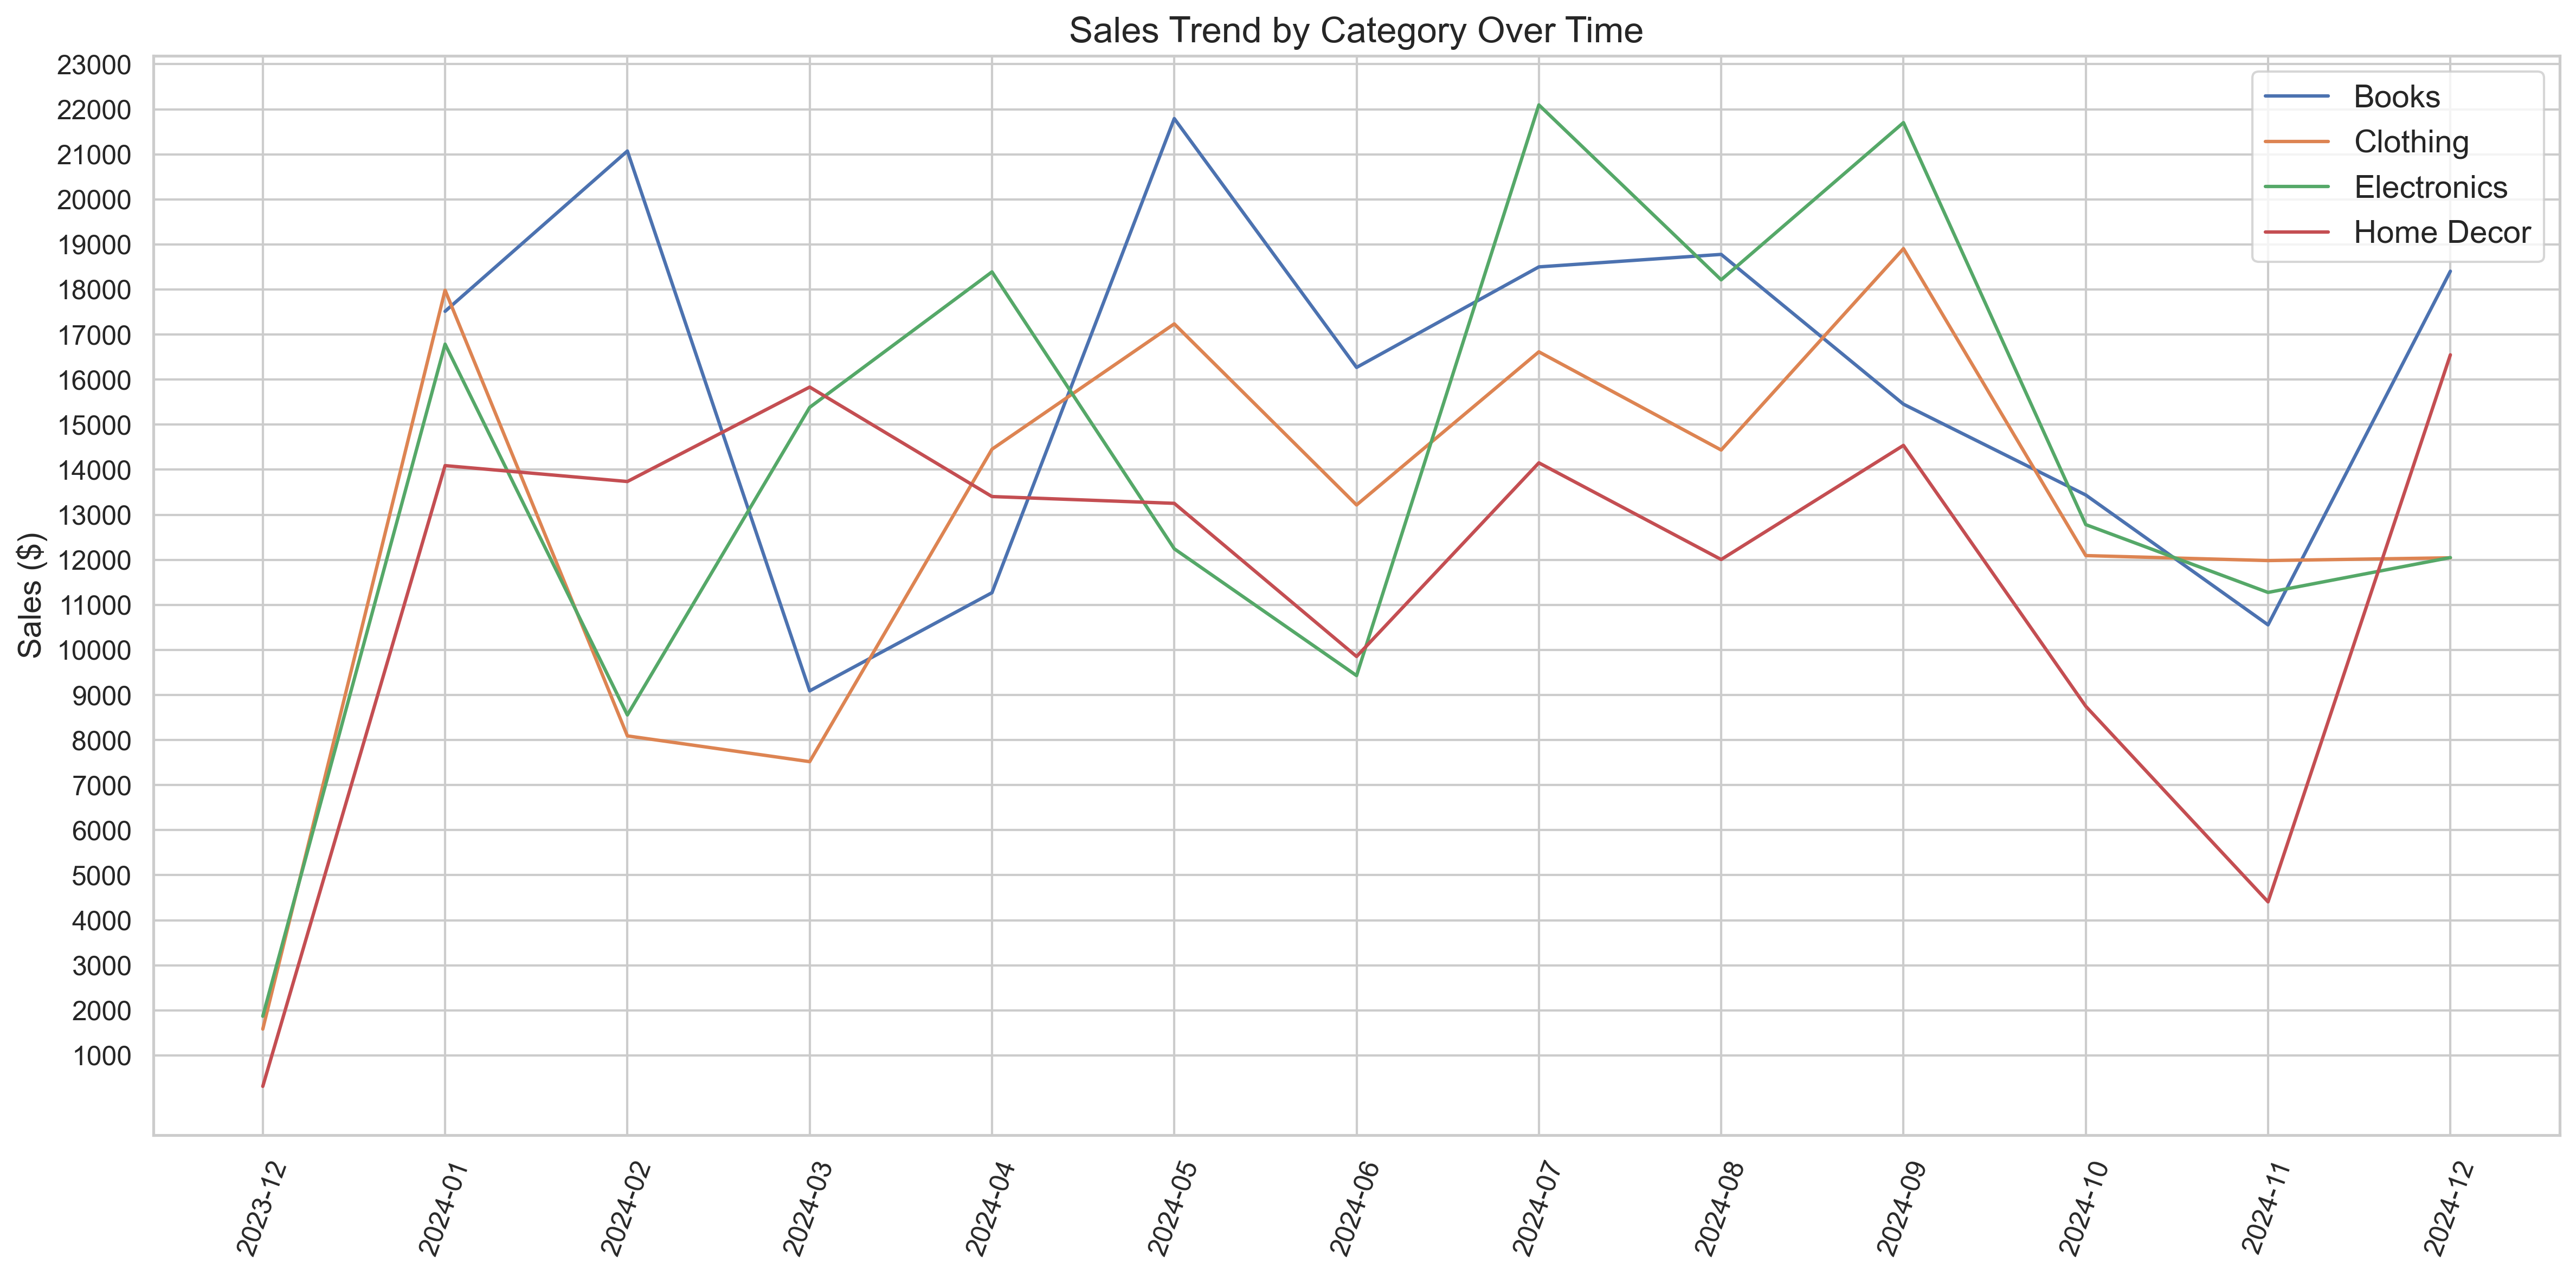

In [69]:
merged_data = pd.merge(transactions_df, products_df, on='ProductID')
merged_data['month']=merged_data['TransactionDate'].dt.to_period('M')
category_sales = merged_data.groupby(['month', 'Category'])['TotalValue'].sum().unstack()
plt.figure(figsize=(16,8),dpi=300)
for category in category_sales.columns:
    plt.plot(category_sales.index.astype(str), category_sales[category], label=category)
plt.xticks(rotation=70, fontsize=12)
plt.yticks(np.arange(1000, category_sales.max().max() + 1000, 1000), fontsize=12)
plt.title('Sales Trend by Category Over Time', fontsize=16)
plt.ylabel('Sales ($)',fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

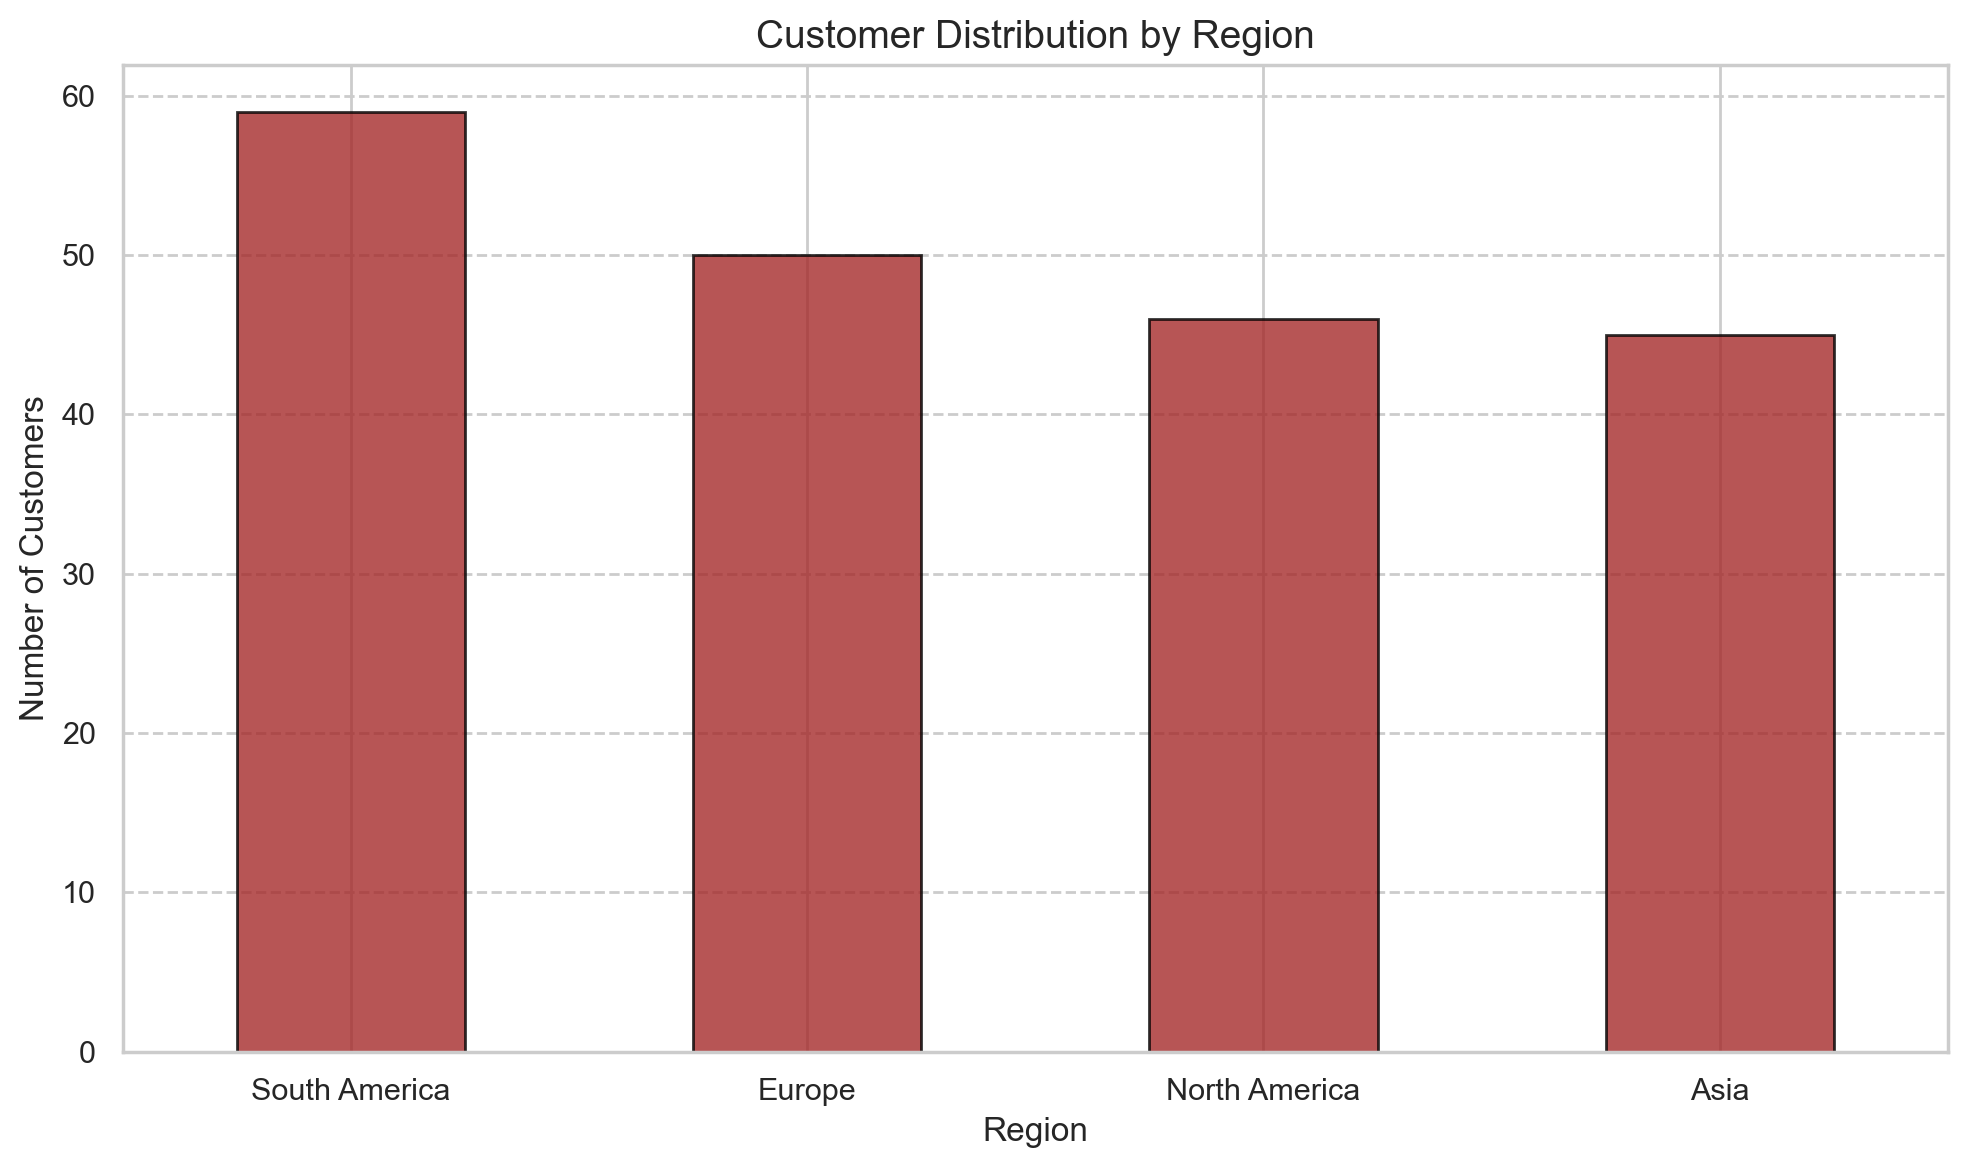

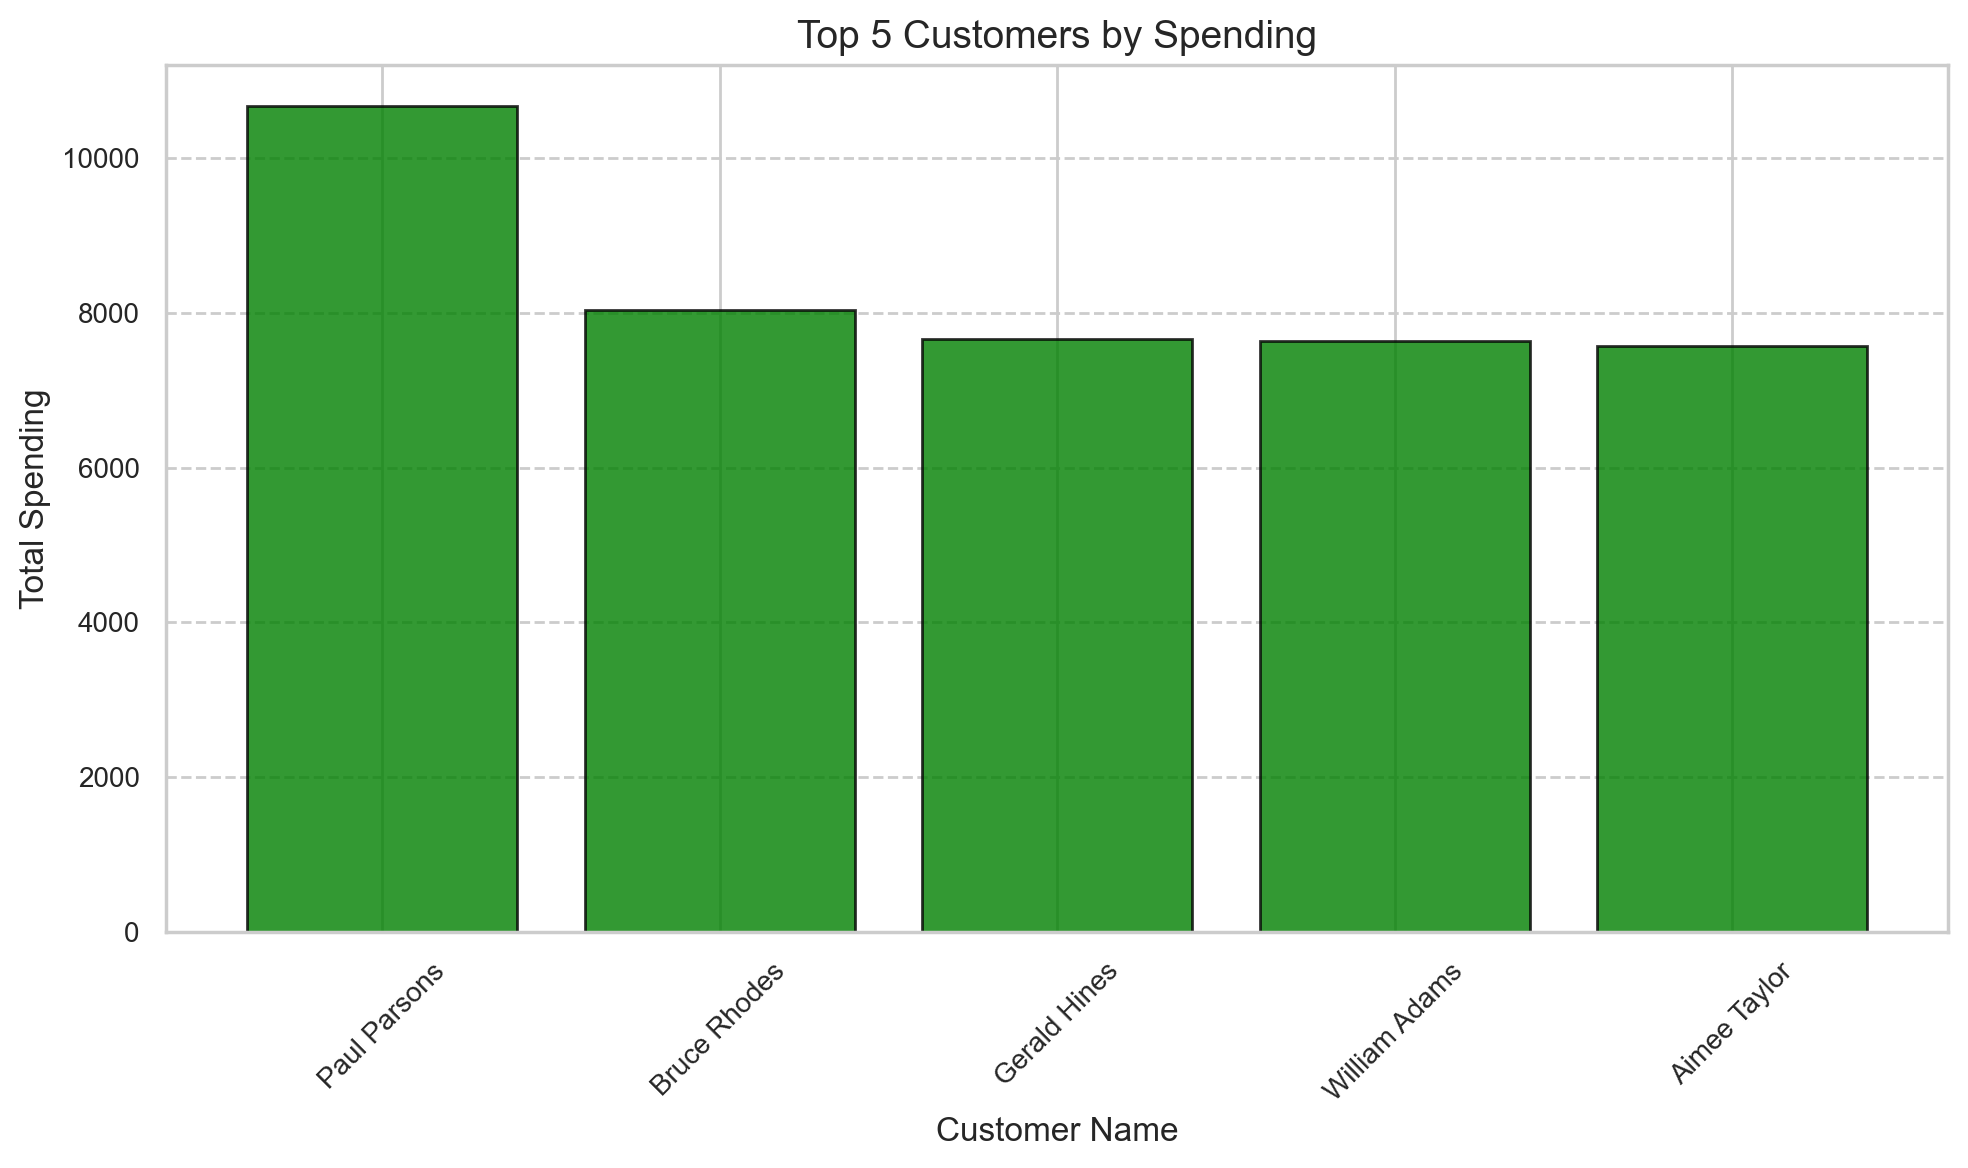

In [110]:
plt.figure(figsize=(10,6),dpi=200)
customers_df['Region'].value_counts().plot(kind='bar',color='brown',edgecolor='black',alpha=0.8)
plt.title('Customer Distribution by Region',fontsize=14)
plt.xlabel('Region',fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Number of Customers',fontsize=12)
plt.grid(axis='y',linestyle='--')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6),dpi=200)
plt.bar(top_spenders['CustomerName'],top_spenders['TotalValue'], color='green', edgecolor='black',alpha=0.8)
plt.title('Top 5 Customers by Spending',fontsize=14)
plt.xlabel('Customer Name',fontsize=12)
plt.ylabel('Total Spending',fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y',linestyle='--')
plt.tight_layout()
plt.show()

Overall Customer Retention Rate: 93.50%


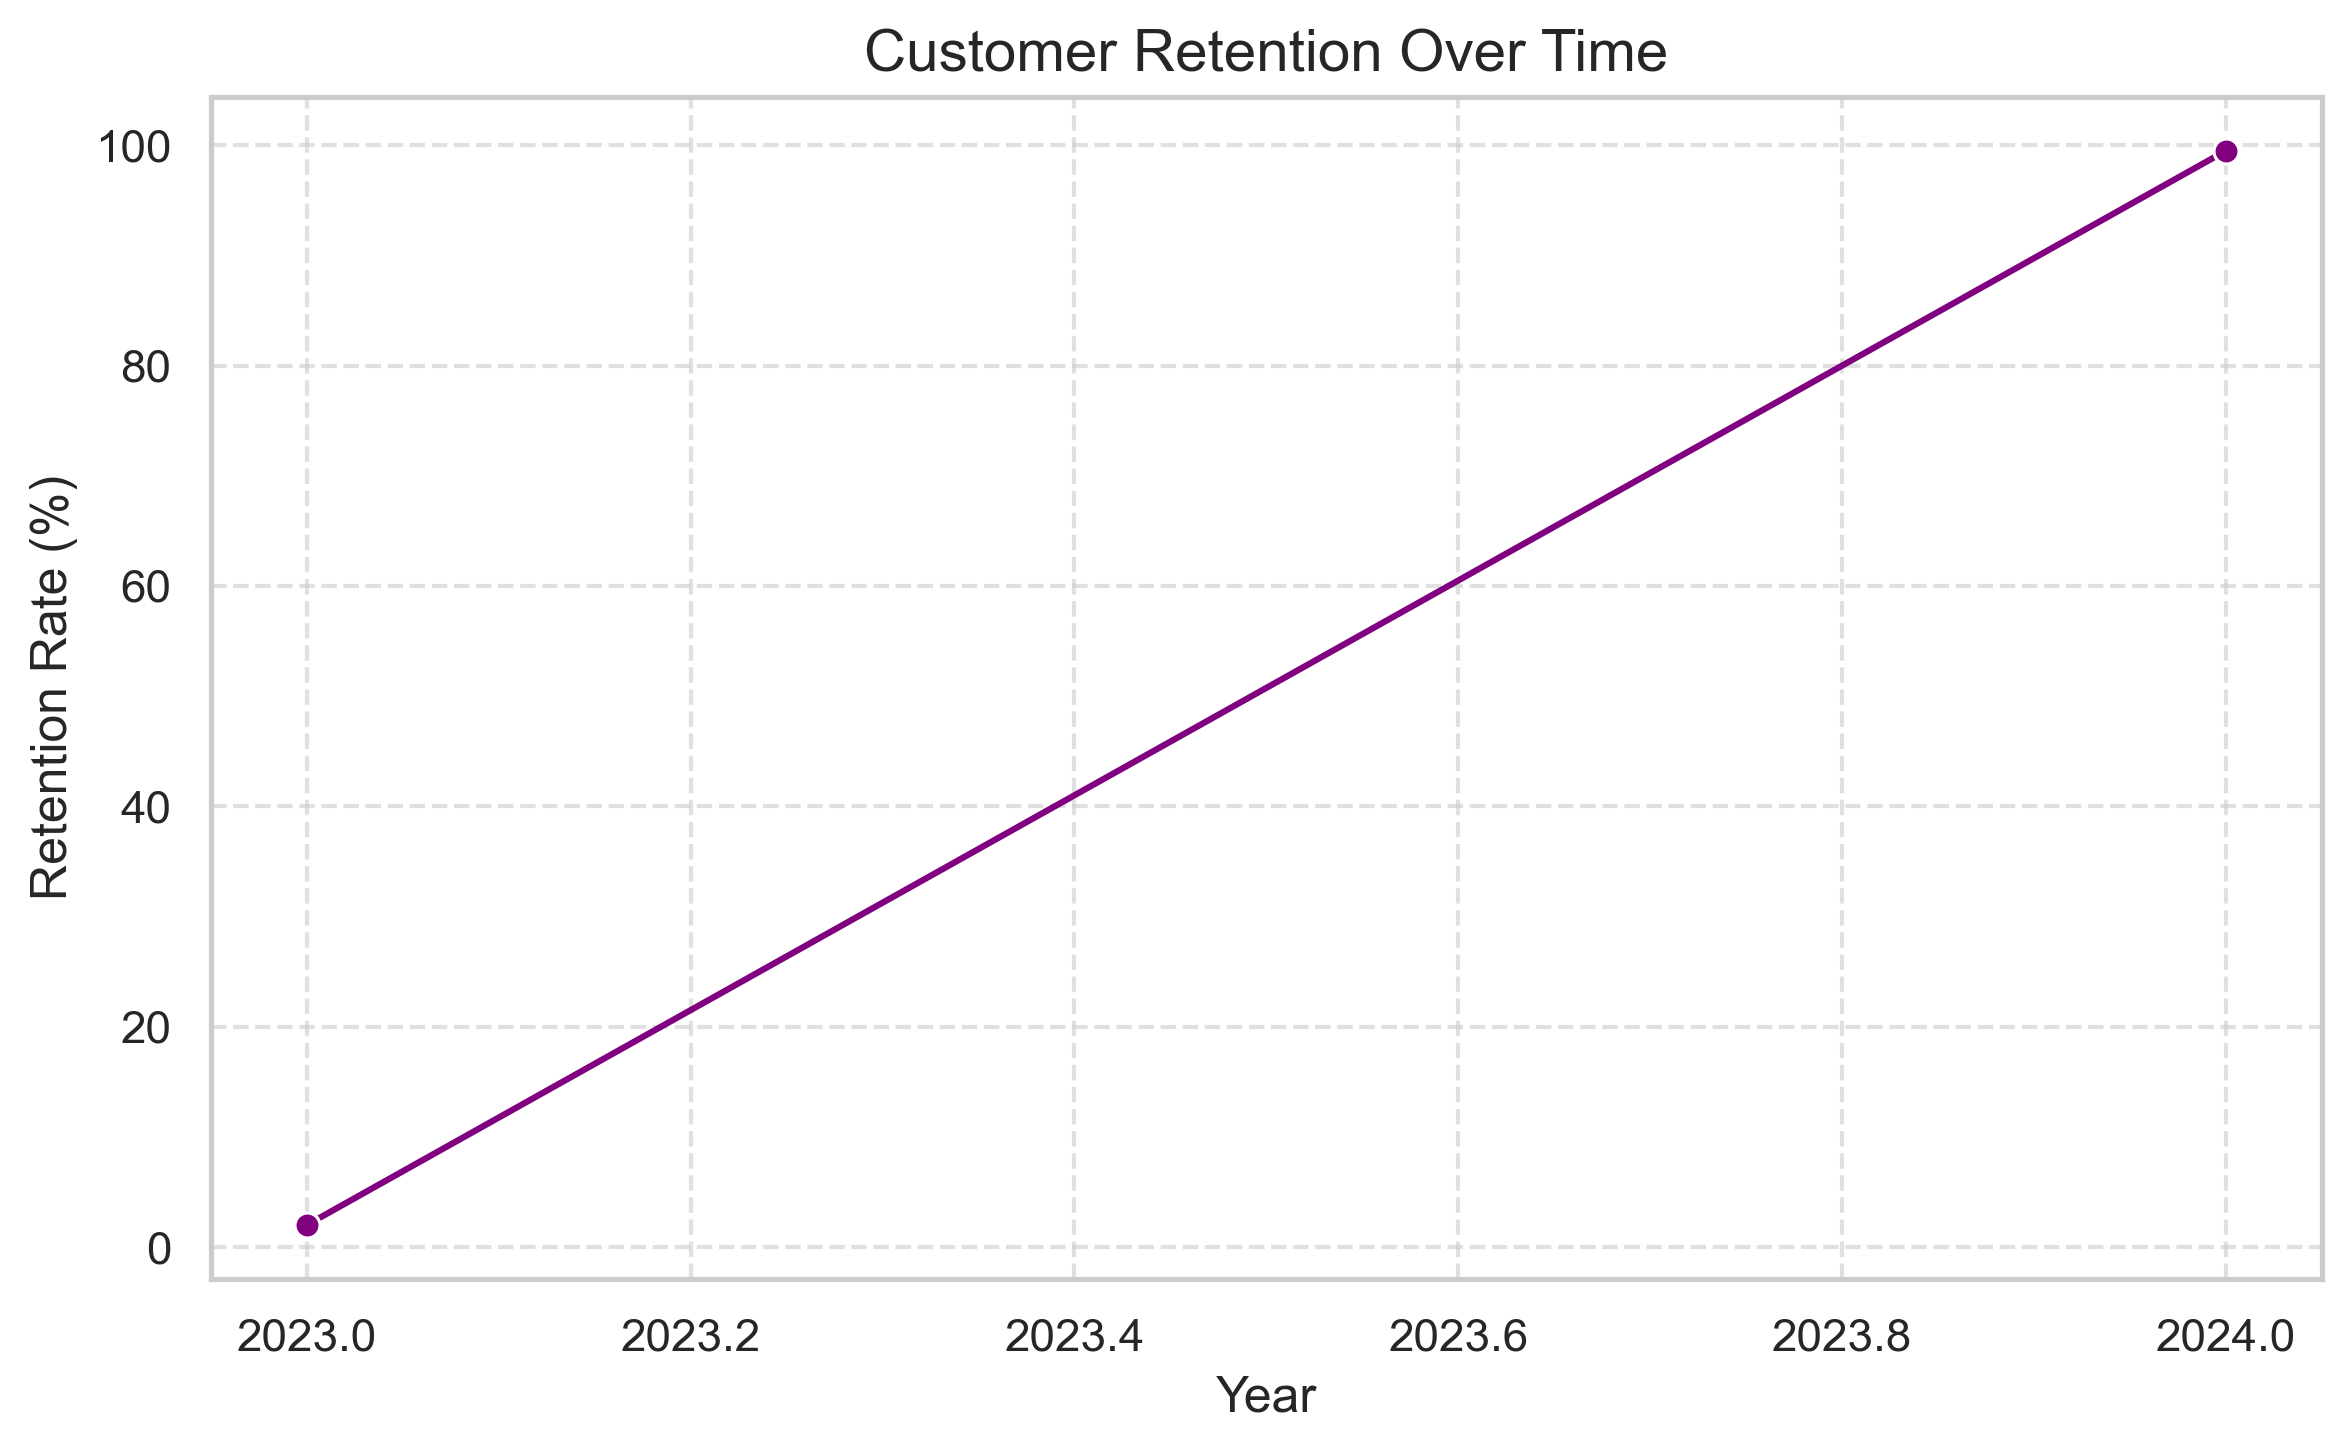


Retention Rate by Product:
ProductName
TechPro Textbook               1.51%
ActiveWear Rug                 1.51%
ActiveWear Smartwatch          1.51%
SoundWave Cookbook             1.51%
HomeSense Desk Lamp            1.51%
ActiveWear Jacket              1.51%
ActiveWear Smartphone          1.01%
SoundWave Jeans                1.01%
HomeSense Sweater              1.01%
HomeSense T-Shirt              0.50%
TechPro T-Shirt                0.50%
TechPro Running Shoes          0.50%
TechPro Novel                  0.50%
SoundWave Headphones           0.50%
SoundWave Desk Lamp            0.50%
SoundWave Bluetooth Speaker    0.50%
ActiveWear Cookware Set        0.50%
HomeSense Rug                  0.50%
HomeSense Cookware Set         0.50%
BookWorld Smartwatch           0.50%
BookWorld Jacket               0.50%
BookWorld Biography            0.50%
ActiveWear Textbook            0.50%
ActiveWear Running Shoes       0.50%
ActiveWear Jeans               0.50%
HomeSense Headphones           0.50

In [196]:
retention=transactions_df.groupby('CustomerID')['TransactionID'].nunique()
retained_customers=retention[retention>1]
retention_rate=len(retained_customers)/len(customers_df)*100
print(f"Overall Customer Retention Rate: {retention_rate:.2f}%")
transactions_df['TransactionYear'] = transactions_df['TransactionDate'].dt.year
retention_by_year = transactions_df.groupby('TransactionYear')['CustomerID'].nunique()/customers_df['CustomerID'].nunique() * 100
plt.figure(figsize=(8, 5),dpi=300)
sns.lineplot(x=retention_by_year.index, y=retention_by_year.values, marker="o", color='purple')
plt.title("Customer Retention Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Retention Rate (%)", fontsize=12)
plt.grid(linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()
transactions_with_details=transactions_df.merge(customers_df[['CustomerID','Region']],on='CustomerID')
transactions_with_details=transactions_with_details.merge(products_df[['ProductID','ProductName']],on='ProductID')
retention_by_product=transactions_with_details.groupby(['ProductName','CustomerID'])['TransactionID'].nunique()
retained_customers_by_product=retention_by_product[retention_by_product>1].reset_index()
retention_rate_by_product=(retained_customers_by_product.groupby('ProductName')['CustomerID'].nunique()
                           /transactions_with_details['CustomerID'].nunique())*100
print("\nRetention Rate by Product:")
print(retention_rate_by_product.sort_values(ascending=False).apply(lambda x:f"{x:.2f}%"))
retention_by_region=transactions_with_details.groupby(['Region','CustomerID'])['TransactionID'].nunique()
retained_customers_by_region=retention_by_region[retention_by_region > 1].reset_index()
retention_rate_by_region=(retained_customers_by_region.groupby('Region')['CustomerID'].nunique()
    / transactions_with_details['CustomerID'].nunique())*100
print("\nRetention Rate by Region:")
print(retention_rate_by_region.sort_values(ascending=False).apply(lambda x: f"{x:.2f}%"))

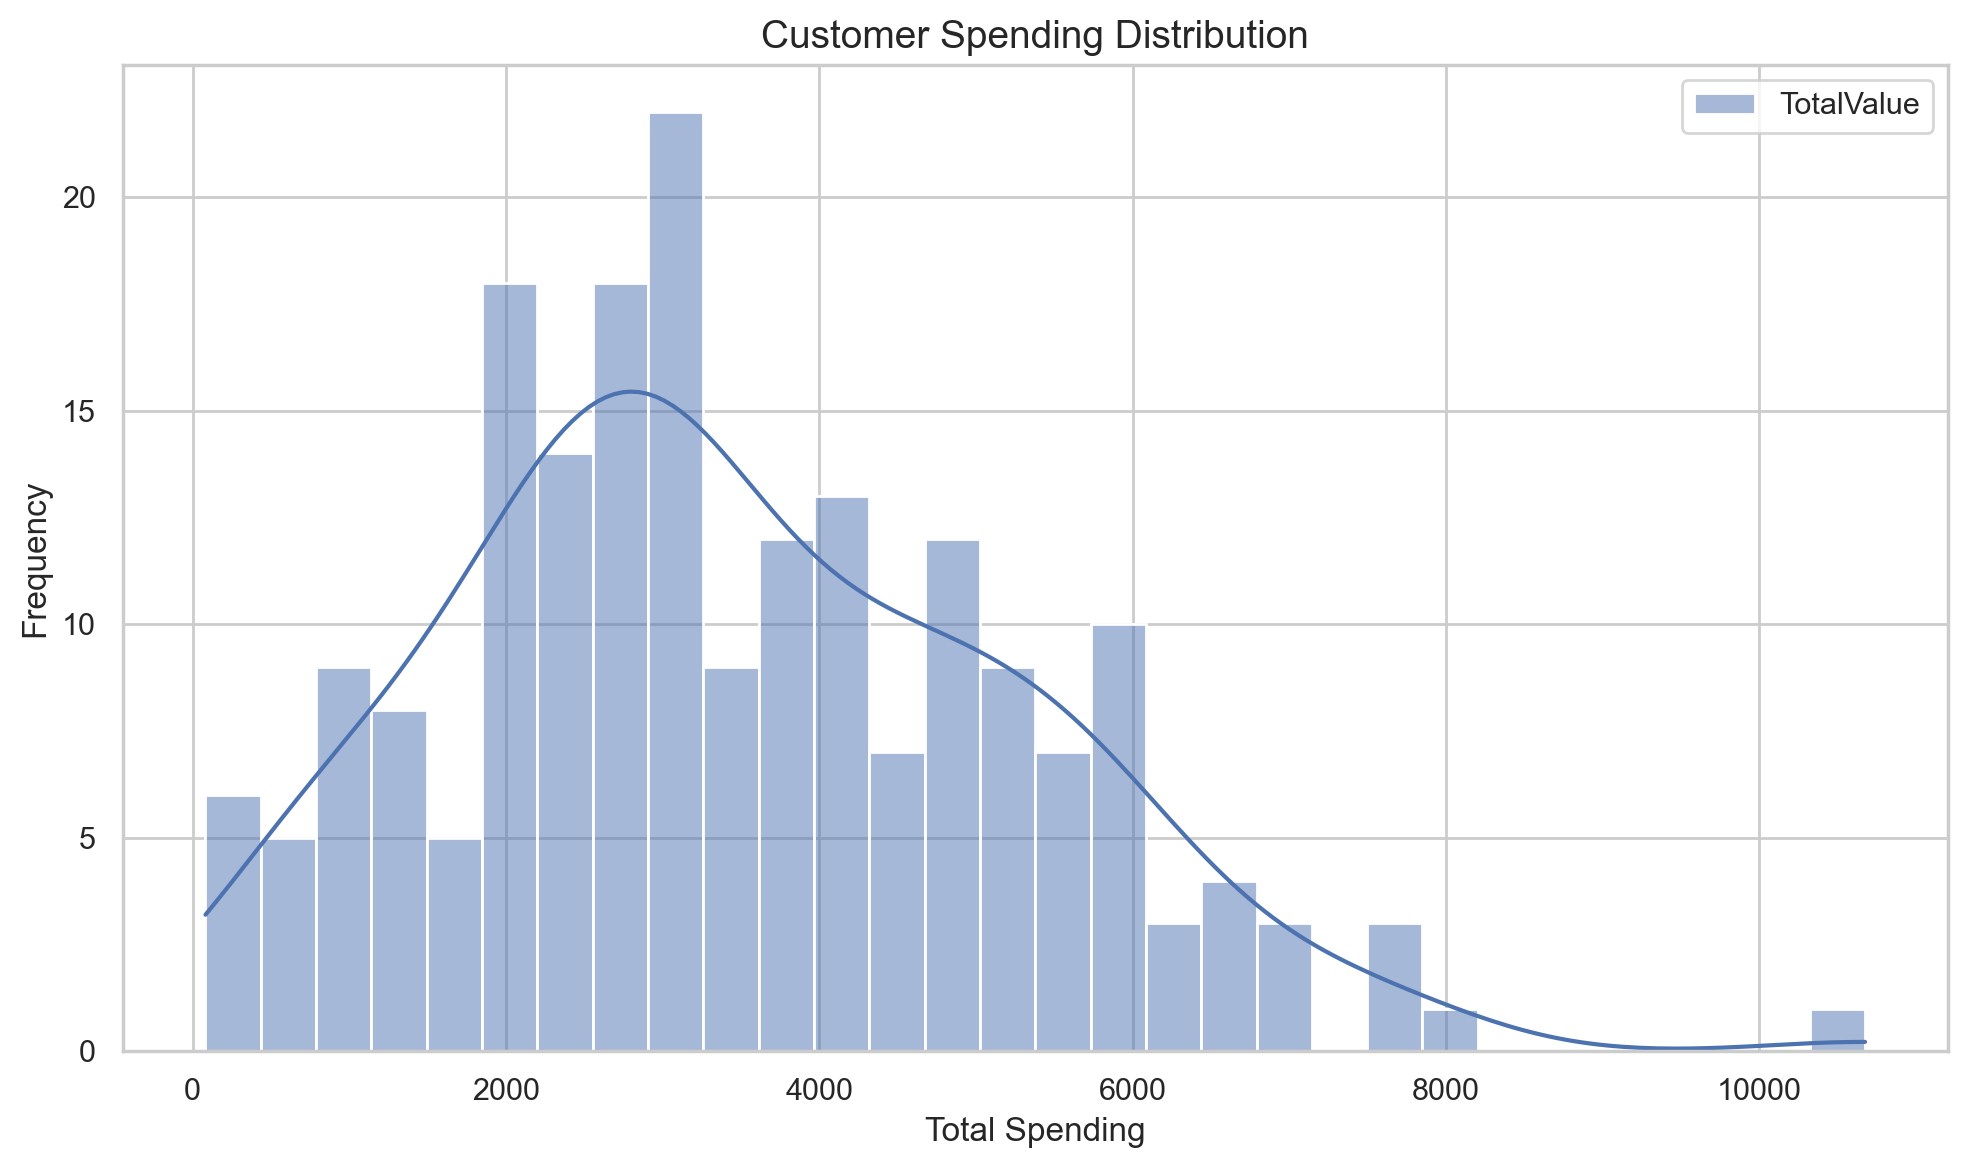

In [197]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(customer_spending, kde=True,color="purple",bins=30)
plt.title('Customer Spending Distribution', fontsize=14)
plt.xlabel('Total Spending',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.tight_layout()
plt.show()

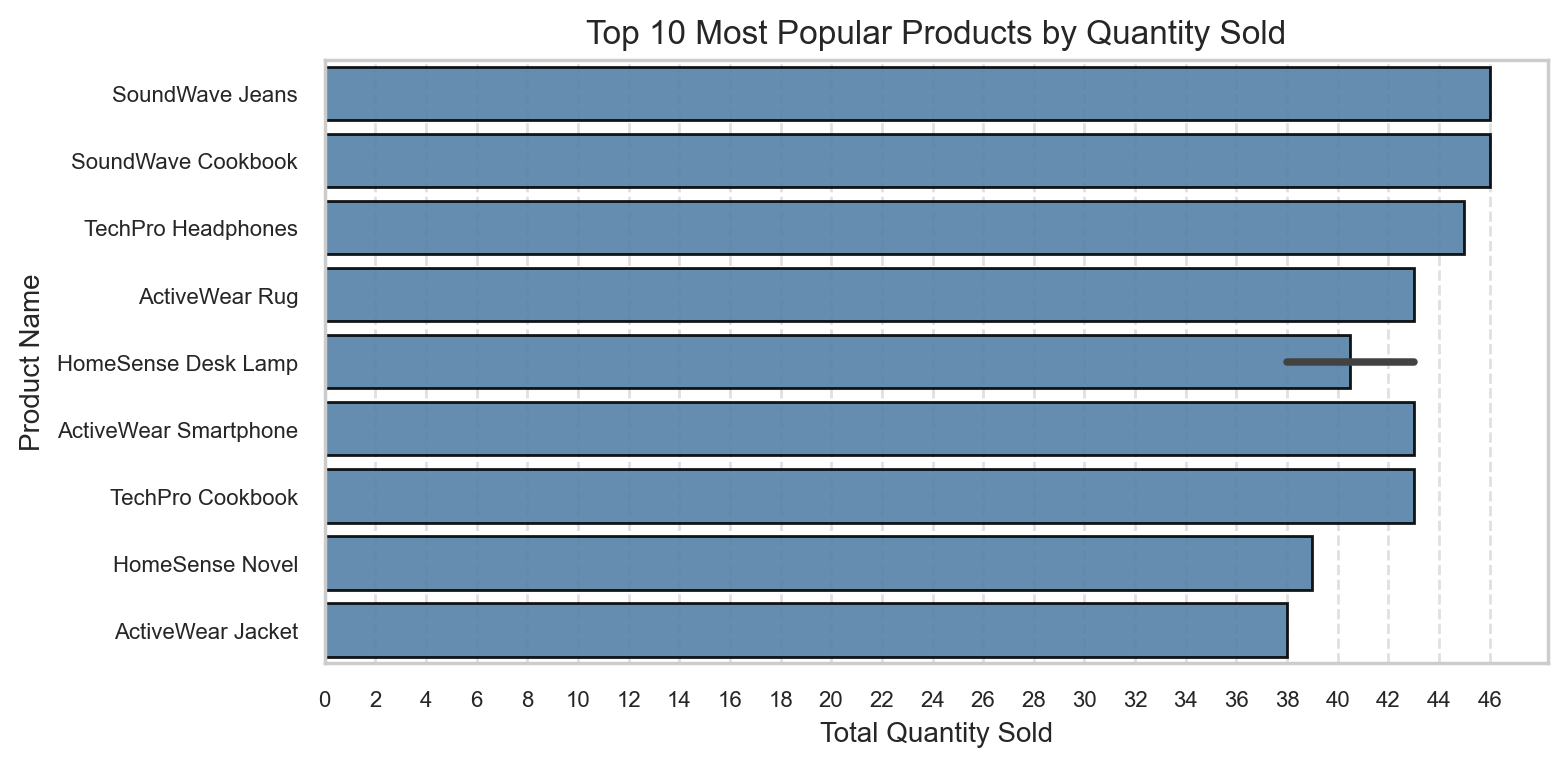

In [192]:
grouped_products=transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
grouped_products=grouped_products.reset_index()
grouped_products['ProductName']=grouped_products['ProductID'].map(
    lambda pid: products_df.loc[products_df['ProductID'] == pid, 'ProductName'].values[0])
top_10_products=grouped_products.head(10)
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x='Quantity',y='ProductName',data=top_10_products,color='steelblue',edgecolor='black',alpha=0.9)
plt.title('Top 10 Most Popular Products by Quantity Sold',fontsize=12)
plt.xlabel('Total Quantity Sold',fontsize=10)
plt.ylabel('Product Name',fontsize=10)
plt.xticks(np.arange(0,top_10_products['Quantity'].max()+2,2),fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

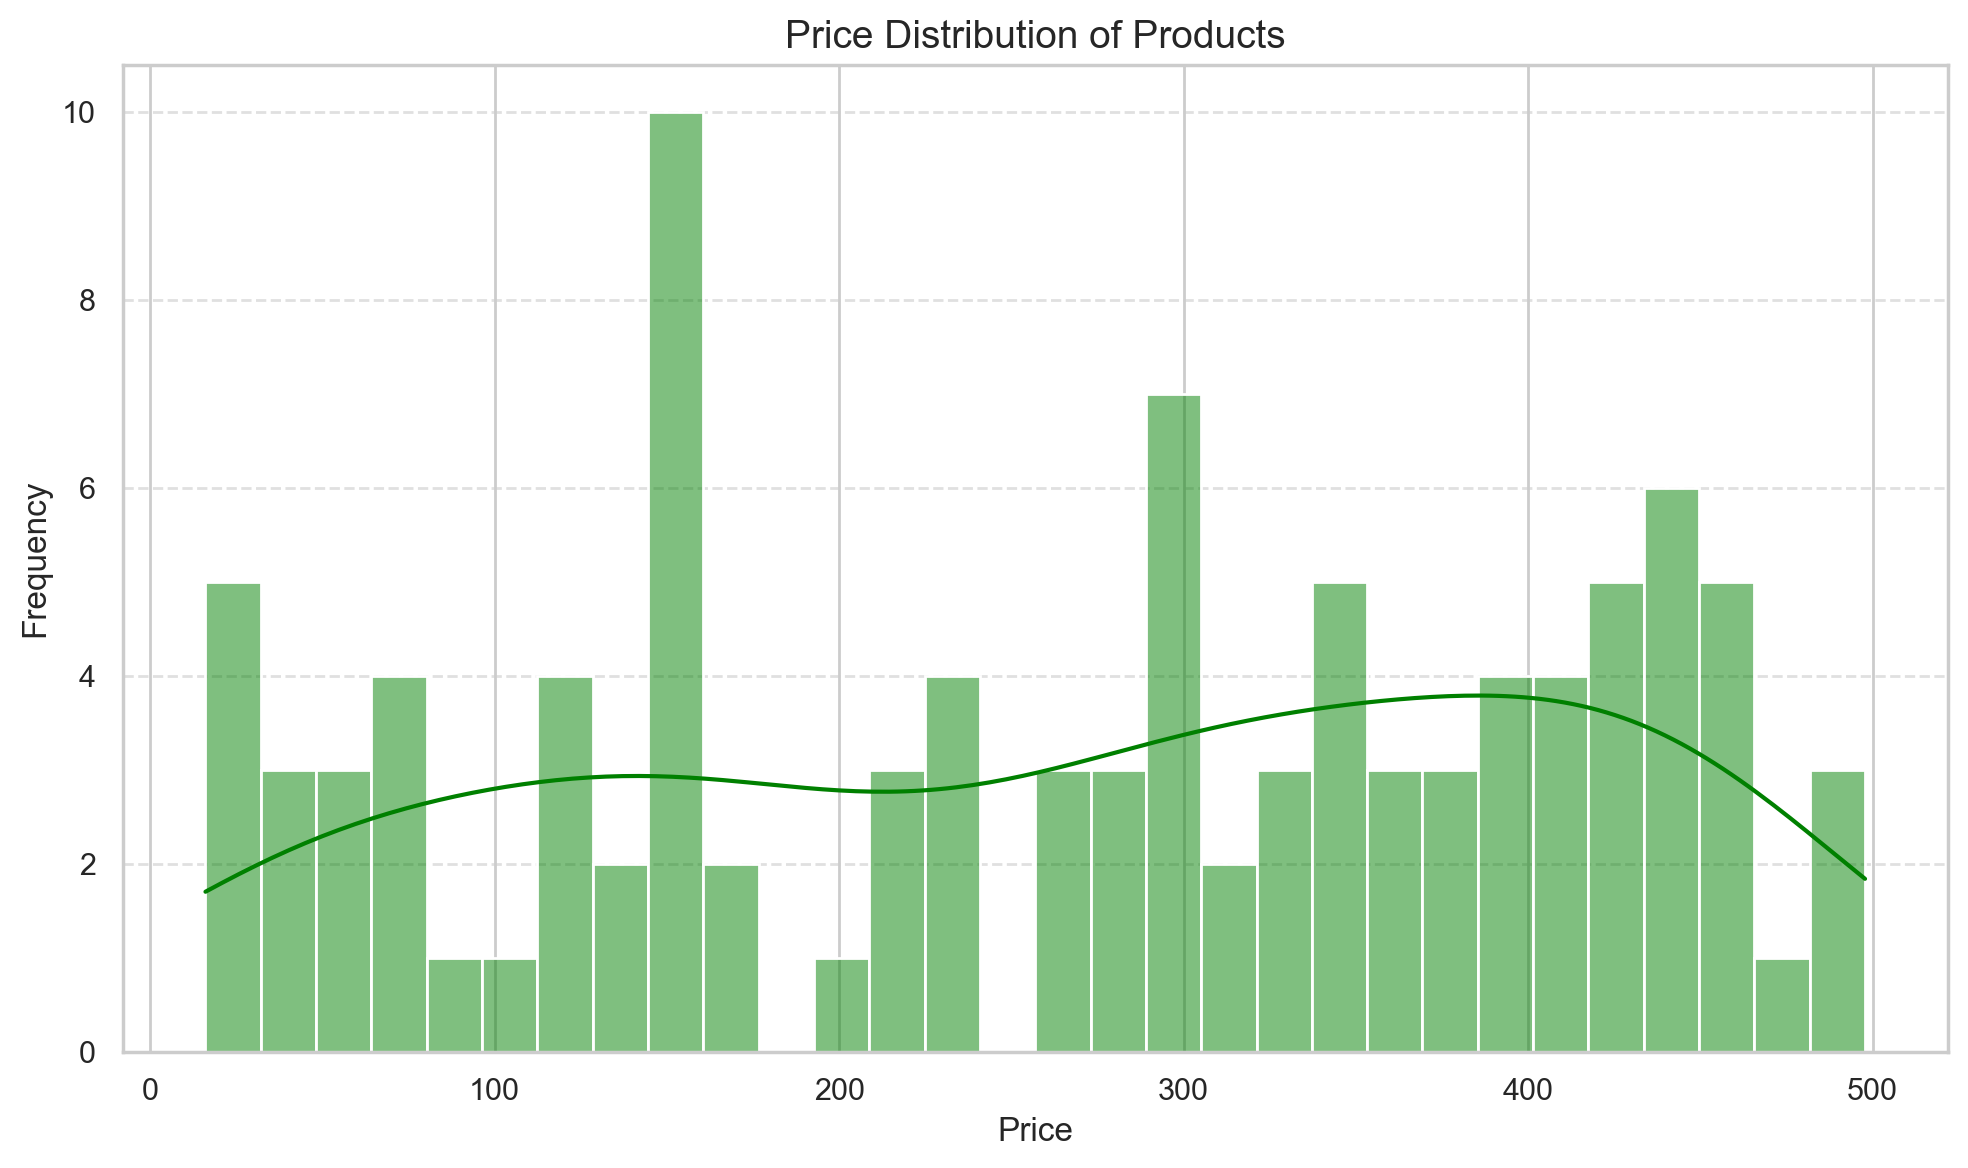

In [128]:
plt.figure(figsize=(10, 6),dpi=200)
sns.histplot(products_df['Price'], kde=True, color='green', bins=30)
plt.title('Price Distribution of Products', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [118]:
customer_revenue = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
customer_revenue_cumsum = customer_revenue.cumsum() / customer_revenue.sum()

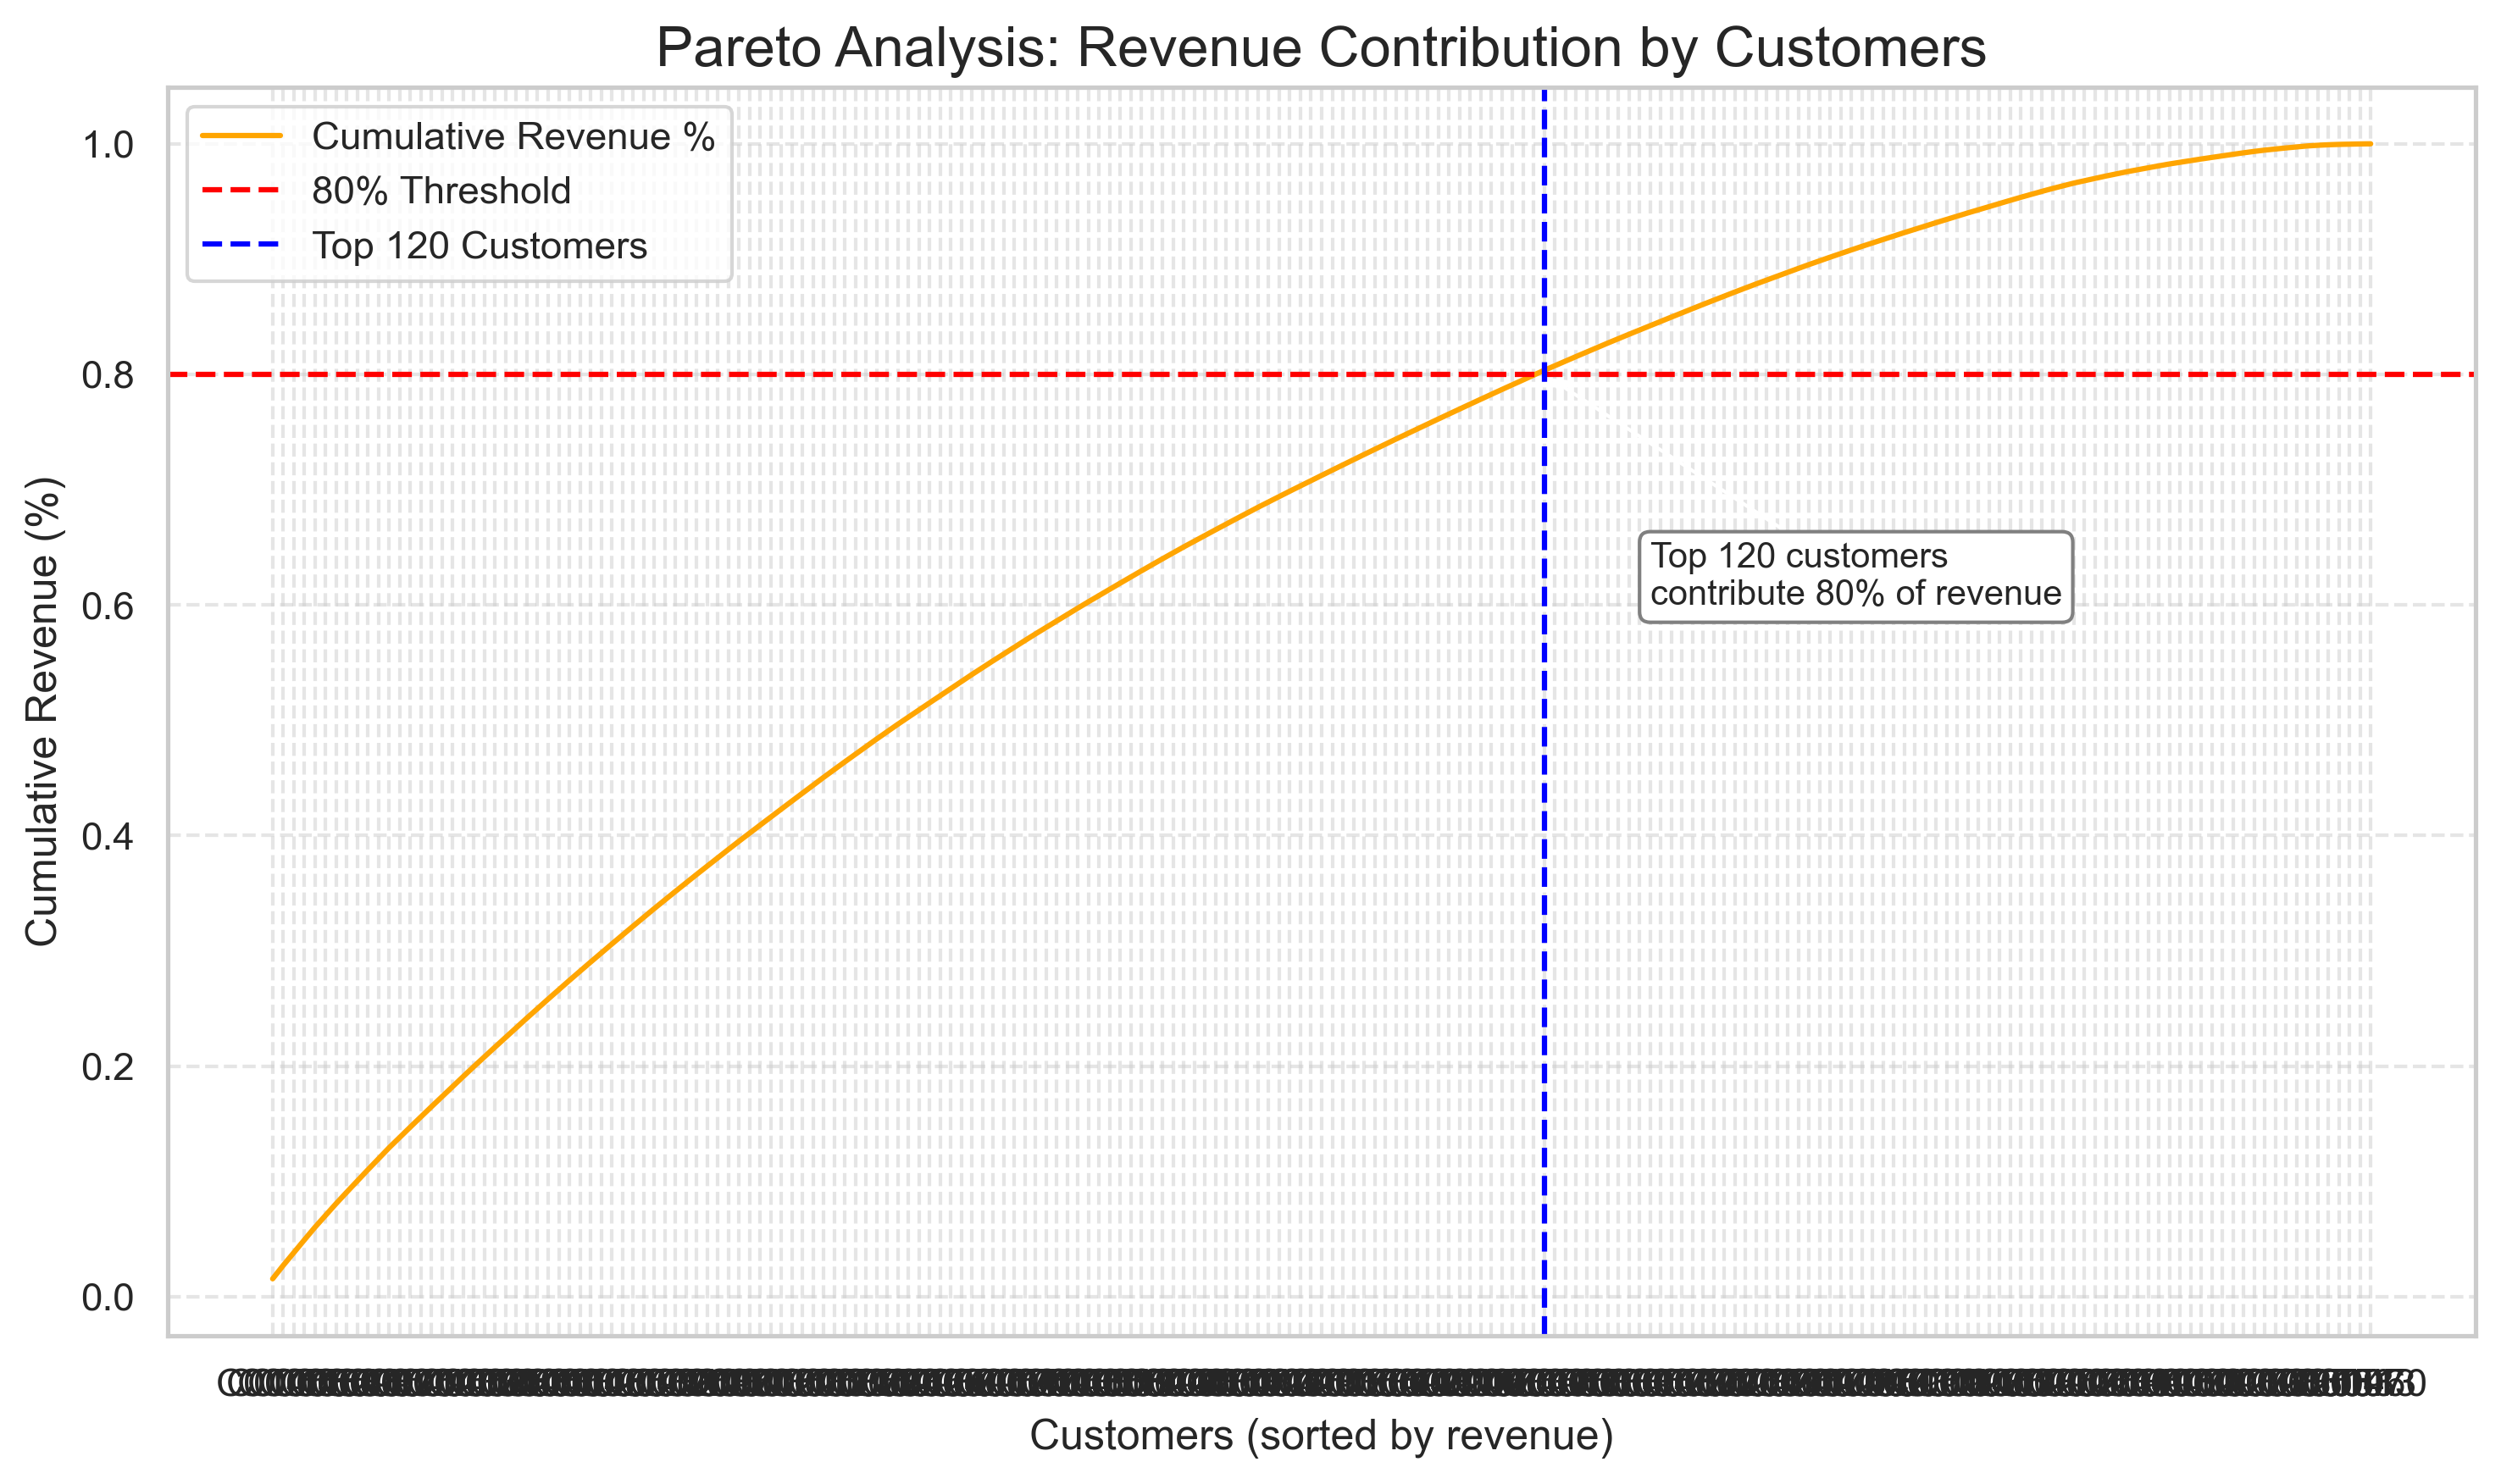

In [187]:
pareto_cutoff=customer_revenue_cumsum[customer_revenue_cumsum <= 0.8]
plt.figure(figsize=(10,6),dpi=300)
plt.plot(customer_revenue_cumsum.index,customer_revenue_cumsum.values,label='Cumulative Revenue %',color='orange')
plt.axhline(0.8,color='red',linestyle='--',label='80% Threshold')
plt.axvline(len(pareto_cutoff),color='blue',linestyle='--',label=f'Top {len(pareto_cutoff)} Customers')
plt.title('Pareto Analysis: Revenue Contribution by Customers',fontsize=16)
plt.xlabel('Customers (sorted by revenue)',fontsize=12)
plt.ylabel('Cumulative Revenue (%)',fontsize=12)
plt.legend()
plt.annotate(f"Top {len(pareto_cutoff)} customers\ncontribute 80% of revenue",
    xy=(len(pareto_cutoff), 0.8),xytext=(len(pareto_cutoff) + 10, 0.6),
    arrowprops=dict(facecolor='black',arrowstyle='->'),fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3',facecolor='white',edgecolor='gray'))
plt.grid(alpha=0.5,linestyle='--')
plt.tight_layout()
plt.show()

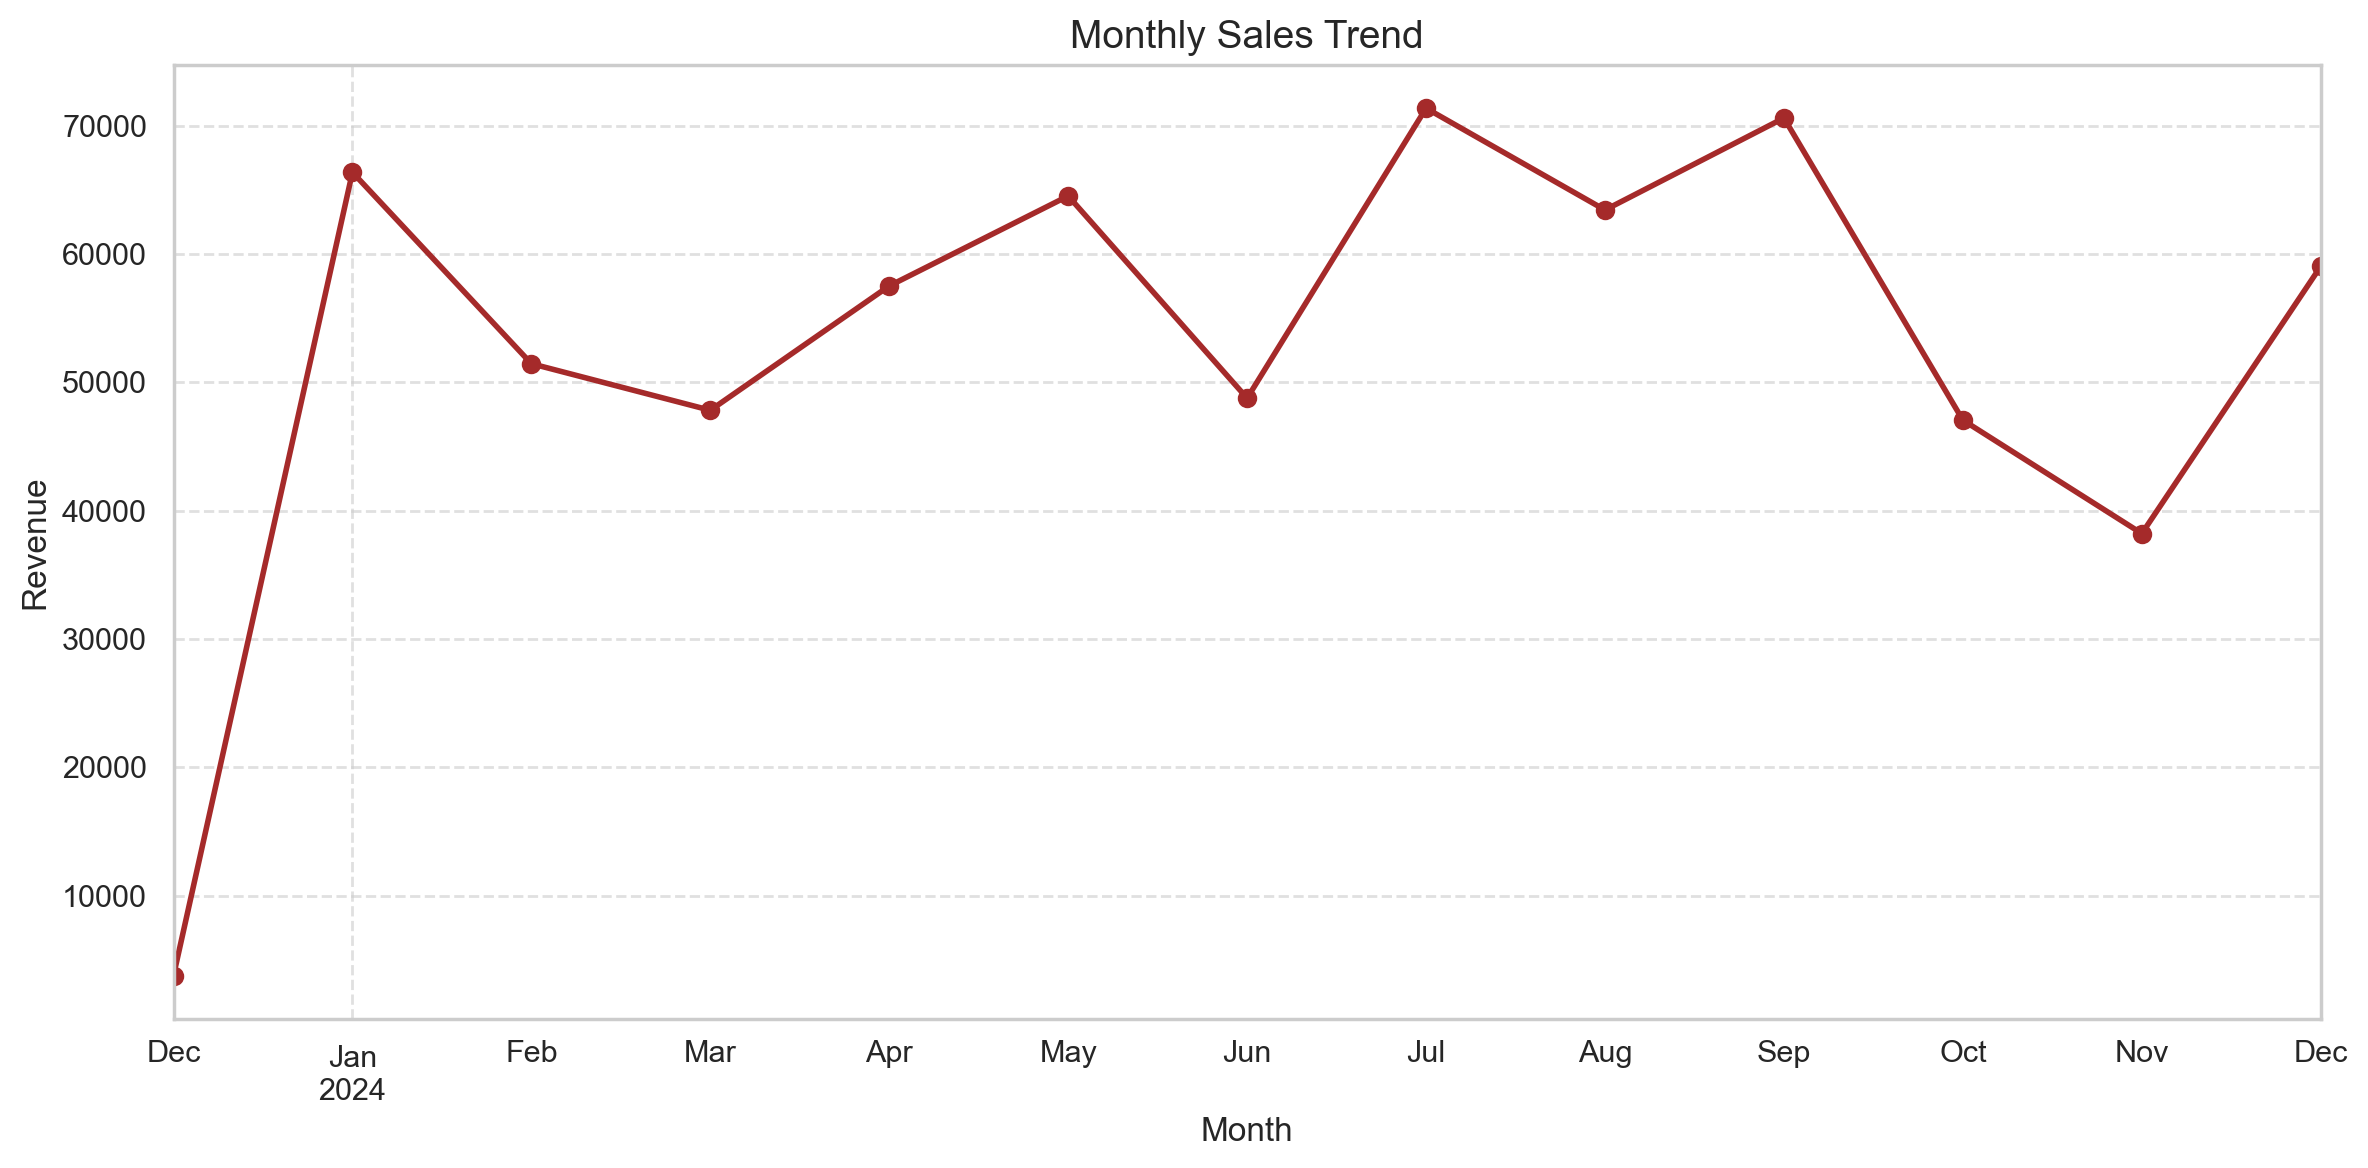

In [189]:
transactions_df['Month']=transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales=transactions_df.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12,6),dpi=200)
monthly_sales.plot(kind='line',marker='o',color='brown',linewidth=2)
plt.title('Monthly Sales Trend',fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.grid(axis='both',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [103]:
print("Total Transactions:",total_transactions)
print("Unique Customers:",unique_customers)
print("Unique Products:",unique_products)
print("Total Revenue:",total_revenue)

Total Transactions: 1000
Unique Customers: 199
Unique Products: 100
Total Revenue: 689995.56


In [104]:
print("\nHighest Transaction:")
print(tabulate(highest_transaction.to_frame().T,headers='keys',tablefmt='grid'))
print("\nTop 5 Spenders:")
print(tabulate(top_spenders.reset_index().rename(
    columns={'index':'CustomerID','TotalValue':'Spending'}),headers='keys',tablefmt='grid'))
print("\nMost Popular Product:")
print(tabulate(most_popular_product, headers='keys',tablefmt='grid'))
print("\nTransaction Trends Over Time:")
print(tabulate(transactions_over_time.reset_index().rename(
    columns={'index':'Month','TransactionDate':'Transaction Count'}),headers='keys',tablefmt='grid'))


Highest Transaction:
+-----+-----------------+--------------+-------------+---------------------+------------+--------------+---------+---------+
|     | TransactionID   | CustomerID   | ProductID   | TransactionDate     |   Quantity |   TotalValue |   Price | Month   |
+=====+=================+==============+=============+=====================+============+==============+=========+=========+
| 879 | T00928          | C0082        | P075        | 2024-09-06 18:39:07 |          4 |      1991.04 |  497.76 | 2024-09 |
+-----+-----------------+--------------+-------------+---------------------+------------+--------------+---------+---------+

Top 5 Spenders:
+----+--------------+--------------+------------+----------------+
|    |   CustomerID | CustomerID   |   Spending | CustomerName   |
+====+==============+==============+============+================+
|  0 |            0 | C0141        |   10673.9  | Paul Parsons   |
+----+--------------+--------------+------------+----------------+
|